# Steps:
1) preprocessing

2) splitting

3) tokenize & padding

4) Create model & train

5) evaluate

# Preprocessing (cleaning the datasets):

1) remove html entity

2) change user tags (@xxx -> user)

3) remove urls

4) remove unnecessary symbol ('', !, ", ') -> cause a lot of noise in the dataset

5) remove stopwords

# 1| Import libraries

1. __pandas__: This module is used for data manipulation and analysis. It provides flexible data structures, including the DataFrame, which allows you to read, write, and perform operations on tabular data such as CSV files in your case.

2. __re (regex)__: This module is used for working with regular expressions in Python. Regular expressions are sequences of characters used for searching and manipulating text strings. In your code, it is used to detect specific patterns such as usernames, URLs, and HTML entities in the text.

3. __nltk (Natural Language Toolkit)__: It is a popular Python library for natural language processing. It provides various functionalities and linguistic resources for working with text data. In your code, it is used to perform word tokenization, which means splitting a sentence into individual words or tokens.

4. __nltk.corpus.stopwords__: This is a sub-module of NLTK that contains a list of commonly used words called "stop words." These words are typically empty or uninformative words such as "the," "and," "but," etc. They are often removed during text processing to reduce noise and improve performance.

5. __sklearn.model_selection.train_test_split__: It is a function from scikit-learn that allows you to split data into training and test sets. This is often used to evaluate the performance of a model by reserving a portion of the data for testing.

7. __tensorflow.keras.preprocessing.text.Tokenizer__: This is a class from TensorFlow-Keras used to convert text into sequences of integers. It is useful for text vectorization before feeding it to a machine learning model.

6. __tensorflow.keras.preprocessing.sequence.pad_sequences__: This function from TensorFlow-Keras is used to pad sequences of integers to a uniform length. It is often used to prepare text data before using it in neural network models.

8. __tensorflow.keras.models.Sequential__: It is a class from TensorFlow-Keras that allows you to create sequential neural network models, where layers are stacked on top of each other in a specific order.

9. __tensorflow.keras.layers.Embedding__: This layer in TensorFlow-Keras is used for word representation as dense vectors in a reduced-dimensional space. It is often used as the first layer in natural language processing models.

10. __tensorflow.keras.layers.LSTM__: It is a recurrent neural network (RNN) layer called Long Short-Term Memory (LSTM). It is used for sequence processing and is particularly suitable for text analysis.

11. __tensorflow.keras.layers.Dense__: This layer in TensorFlow-Keras is a fully connected dense layer, where each neuron is connected to all neurons in the previous layer. It is used to represent fully connected layers in a neural network.

12. __tensorflow.keras.layers.Dropout__: This layer in TensorFlow-Keras is used to apply a regularization technique called "dropout." It randomly deactivates some neurons during training, which helps prevent overfitting of the model.

13. __keras.utils.to_categorical__: This function from Keras is used to convert categorical variables into binary variables. It is often used to convert labels or classes into one-hot encoding.

14. __keras.backend__: It is a Keras module that provides low-level functions and operations to interact with the underlying backend, such as TensorFlow in this case.

In [1]:
import pandas as pd # read the csv
import re # regex to detect username, url, html entity 
import nltk # to use word tokenize (split the sentence into words)
from nltk.corpus import stopwords # to remove the stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from keras.utils import to_categorical
from keras import backend as K

2024-05-15 13:23:37.714624: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2| read the data


This dataset, named hate_speech_offensive, is a meticulously curated collection of annotated tweets with the specific purpose of detecting hate speech and offensive language. The dataset primarily consists of English tweets and is designed to train machine learning models or algorithms in the task of hate speech detection. It should be noted that the dataset has not been divided into multiple subsets, and only the train split is currently available for use.

The dataset includes several columns that provide valuable information for understanding each tweet's classification. The column 
- __count__ represents the total number of annotations provided for each tweet, 

- whereas __hate_speech_count__ signifies how many annotations classified a particular tweet as hate speech. 

- On the other hand, __offensive_language_count__ indicates the number of annotations categorizing a tweet as containing offensive language. 

- Additionally, __neither_count__ denotes how many annotations identified a tweet as neither hate speech nor offensive language.

For researchers and developers aiming to create effective models or algorithms capable of detecting hate speech and offensive language on Twitter, this comprehensive dataset offers a rich resource for training and evaluation purposes. [Read more](https://www.kaggle.com/datasets/thedevastator/hate-speech-and-offensive-language-detection)

In [11]:
# show content of stop words
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/djiemboutienctheuvictornico/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/djiemboutienctheuvictornico/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'stop_words' is not defined

In [4]:
data = pd.read_csv("train.csv")

data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
# show the values of class
data['class'].unique()

array([2, 1, 0])

In [6]:
# hate speech class
data[data['class'] == 0]

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,3,2,1,0,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...,...,...,...,...
24576,3,2,1,0,0,this guy is the biggest faggot omfg
24685,3,2,1,0,0,which one of these names is more offensive kik...
24751,3,2,1,0,0,you a pussy ass nigga and I know it nigga.
24776,3,3,0,0,0,you're all niggers


In [7]:
# offensive language class
data[data['class'] == 1]

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
...,...,...,...,...,...,...
24774,3,0,3,0,1,you really care bout dis bitch. my dick all in...
24775,3,0,3,0,1,"you worried bout other bitches, you need me for?"
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...


In [8]:
# normal language class
data[data['class'] == 2]

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
40,3,0,1,2,2,""" momma said no pussy cats inside my doghouse """
63,3,0,0,3,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://..."
66,3,0,1,2,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo..."
67,3,0,1,2,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these..."
...,...,...,...,...,...,...
24736,3,0,0,3,2,yaya ho.. cute avi tho RT @ViVaLa_Ari I had no...
24737,3,0,1,2,2,yea so about @N_tel 's new friend.. all my fri...
24767,3,0,1,2,2,"you know what they say, the early bird gets th..."
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."


In [9]:
# dataset shape to know how many tweets in the datasets
print(f"num of tweets: {data.shape}")

# extract the text and labels
tweet = list(data['tweet'])
labels = list(data['class'])

num of tweets: (24783, 6)


# 3| functions to clean the data

In [10]:
#notes : all of the function taking 1 text at a time
stop_words = set(stopwords.words('english'))
# add rt to remove retweet in dataset (noise)
stop_words.add("rt")
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
# remove html entity:
def remove_entity(raw_text):
    entity_regex = r"&[^\s;]+;"
    text = re.sub(entity_regex, "", raw_text)
    return text

# change the user tags
def change_user(raw_text):
    regex = r"@([^ ]+)"
    text = re.sub(regex, "user", raw_text)

    return text

# remove urls
def remove_url(raw_text):
    url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    text = re.sub(url_regex, '', raw_text)

    return text

# remove unnecessary symbols
def remove_noise_symbols(raw_text):
    text = raw_text.replace('"', '')
    text = text.replace("'", '')
    text = text.replace("!", '')
    text = text.replace("`", '')
    text = text.replace("..", '')

    return text

# remove stopwords
def remove_stopwords(raw_text):
    tokenize = nltk.word_tokenize(raw_text)
    text = [word for word in tokenize if not word.lower() in stop_words]
    text = " ".join(text)

    return text

## this function in to clean all the dataset by utilizing all the function above
def preprocess(datas):
    clean = []
    # change the @xxx into "user"
    clean = [change_user(text) for text in datas]
    # remove emojis (specifically unicode emojis)
    clean = [remove_entity(text) for text in clean]
    # remove urls
    clean = [remove_url(text) for text in clean]
    # remove trailing stuff
    clean = [remove_noise_symbols(text) for text in clean]
    # remove stopwords
    clean = [remove_stopwords(text) for text in clean]

    return clean

In [12]:
# call the cleaning function
clean_tweet = preprocess(tweet)

In [13]:
clean_tweet[:5]

['user woman shouldnt complain cleaning house . man always take trash .',
 'user boy dats cold.tyga dwn bad cuffin dat hoe 1st place',
 'user Dawg user ever fuck bitch start cry ? confused shit',
 'user user look like tranny',
 'user shit hear might true might faker bitch told ya']

# 4| Splitting the dataset into test and validation

In [14]:
X_train, X_test, y_train, y_test = train_test_split(clean_tweet, labels, test_size=0.2, random_state=42)

In [15]:
## Tokenizing -> basically we use tokenisation for many things, its commonly used for feature extraction in preprocessing. btw idk how it works as feature extraction tho :(
# declare the tokenizer
tokenizer = Tokenizer()
# build the vocabulary based on train dataset
tokenizer.fit_on_texts(X_train)
# tokenize the train and test dataset
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# vocabulary size (num of unique words) -> will be used in embedding layer
vocab_size = len(tokenizer.word_index) + 1

In [17]:
import joblib

# save the tokenizer fn
joblib.dump(tokenizer,'../models/tokenizer.sav')

['../models/tokenizer.sav']

In [19]:
## Padding -> to uniform the datas
max_length = max(len(seq) for seq in X_train)
joblib.dump(max_length,'../models/max_length.sav')

# to test an outlier case (if one of the test dataset has longer length)
for x in X_test:
    if len(x) > max_length:
        print(f"an outlier detected: {x}")
# uniformize sequences
X_train = pad_sequences(X_train, maxlen = max_length)
X_test = pad_sequences(X_test, maxlen = max_length)

In [20]:
# create hot_labels
y_test = to_categorical(y_test, num_classes=3)
y_train = to_categorical(y_train, num_classes=3)

In [21]:
(y_test,y_train)

(array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=float32),
 array([[1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=float32))

In [22]:
# another look on the number of tweet in test and training data

print(f"num test tweet: {y_test.shape[0]}")
print(f"num train tweet: {y_train.shape[0]}")

num test tweet: 4957
num train tweet: 19826


# 5| Building the model

1. recall(y_true, y_pred):
    - K.round(K.clip(y_true * y_pred, 0, 1)): This operation element-wise multiplies the true labels (y_true) and the model predictions (y_pred), and then rounds the results to the nearest integer. The K.clip() function is used to limit the resulting values between 0 and 1, keeping only the binary values. This yields a matrix of the same shape as y_true and y_pred, with 1s for true positives and 0s for other cases.
    
    - K.sum(K.round(K.clip(y_true * y_pred, 0, 1))): This operation calculates the sum of all elements in the matrix obtained in the previous step, giving the total number of true positives.

    - K.sum(K.round(K.clip(y_true, 0, 1))): This operation calculates the sum of all elements in the y_true matrix, after rounding and clipping between 0 and 1. This corresponds to the total number of actual positives.

    - recall = true_positives / (possible_positives + K.epsilon()): This operation calculates recall by dividing the number of true positives by the total number of actual positives. The value K.epsilon() is added to avoid division by zero.

2. precision(y_true, y_pred):
    - K.round(K.clip(y_true * y_pred, 0, 1)): This operation is similar to the one in recall(). It element-wise multiplies the true labels (y_true) and the model predictions (y_pred), and then rounds the results to the nearest integer. The K.clip() function is used to limit the resulting values between 0 and 1.
    
    - K.sum(K.round(K.clip(y_true * y_pred, 0, 1))): This operation calculates the total number of true positives.
    
    - K.sum(K.round(K.clip(y_pred, 0, 1))): This operation calculates the sum of all elements in the y_pred matrix, after rounding and clipping between 0 and 1. This corresponds to the total number of samples predicted as positives by the model.
    
    - precision = true_positives / (predicted_positives + K.epsilon()): This operation calculates precision by dividing the number of true positives by the total number of samples predicted as positives.

3. f1(y_true, y_pred):
    - precision = precision(y_true, y_pred): This operation calls the precision() function to calculate precision.
    
    - recall = recall(y_true, y_pred): This operation calls the recall() function to calculate recall.
    
    - f1 = 2 * ((precisions * recalls) / (precisions + recalls + K.epsilon())): This operation uses the precision (precisions) and recall (recalls) values to calculate the F1 score. The value K.epsilon() is added to avoid division by zero. The F1 score is a combined measure of precision and recall, providing an overall indication of the performance of a binary classification model.

In [23]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precisions = precision(y_true, y_pred)
    recalls = recall(y_true, y_pred)
    return 2*((precisions*recalls)/(precisions+recalls+K.epsilon()))

In [32]:
# change dis if u want
output_dim = 200

# LSTM model architechture (CNN + LSTM)
model = Sequential([
    # embedding layer is like idk
    Embedding(vocab_size, output_dim, input_length=max_length),
    # lstm for xxx
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    # dropout to prevent overfitting
    Dropout(0.5),
    # dense to connect the previous output with current layer
    Dense(128, activation="relu"),
    # dropout to prevent overfitting
    Dropout(0.5),
    # this is output layer, with 3 class (0, 1, 2)
    Dense(3, activation="softmax"),
])

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1,precision, recall])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# checking the model parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 26, 200)           3734200   
                                                                 
 lstm_1 (LSTM)               (None, 64)                67840     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 3,810,747
Trainable params: 3,810,747
No

In [34]:
# Train the model
model_history = model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
310/310 [==============================] - 25s 72ms/step - loss: 0.4527 - accuracy: 0.8453 - val_loss: 0.3221 - val_accuracy: 0.8905
Epoch 2/10
310/310 [==============================] - 25s 80ms/step - loss: 0.2343 - accuracy: 0.9200 - val_loss: 0.3072 - val_accuracy: 0.8899
Epoch 3/10
310/310 [==============================] - 27s 87ms/step - loss: 0.1489 - accuracy: 0.9474 - val_loss: 0.4468 - val_accuracy: 0.8733
Epoch 4/10
310/310 [==============================] - 40s 129ms/step - loss: 0.1050 - accuracy: 0.9644 - val_loss: 0.4336 - val_accuracy: 0.8771
Epoch 5/10
310/310 [==============================] - 44s 143ms/step - loss: 0.0752 - accuracy: 0.9736 - val_loss: 0.5501 - val_accuracy: 0.8673
Epoch 6/10
310/310 [==============================] - 26s 85ms/step - loss: 0.0661 - accuracy: 0.9770 - val_loss: 0.6171 - val_accuracy: 0.8765
Epoch 7/10
310/310 [==============================] - 26s 83ms/step - loss: 0.0553 - accuracy: 0.9799 - val_loss: 0.7023 - val_accurac

In [35]:
# save the tokenizer fn
joblib.dump(model,'../models/model.sav')

INFO:tensorflow:Assets written to: ram://4118bec0-6660-4f49-9358-fa728a7ae99d/assets


['../models/model.sav']

In [37]:
model.save('../models/model.h5')

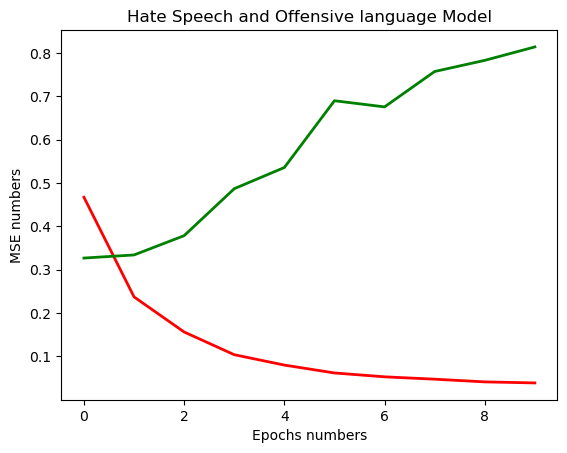

In [29]:
import matplotlib.pyplot as plt
hist = model.history.history
plt.plot(hist['loss'],'r',linewidth=2, label='Training loss')
plt.plot(hist['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('Hate Speech and Offensive language Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()